In [1]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense
import cv2

C:\Users\Yigit\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

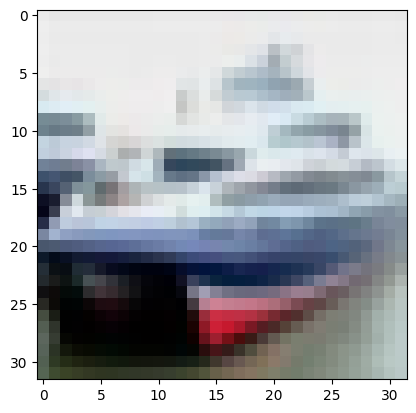

In [8]:
plt.imshow(x_test[1])

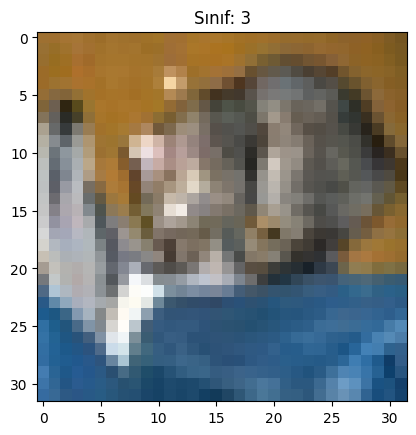

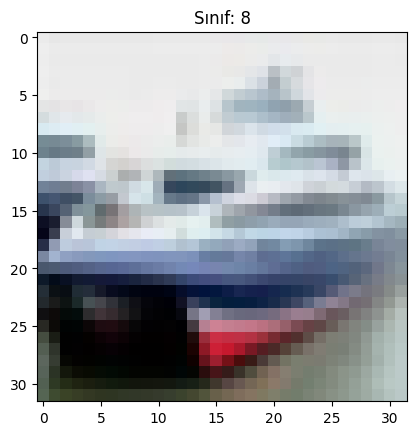

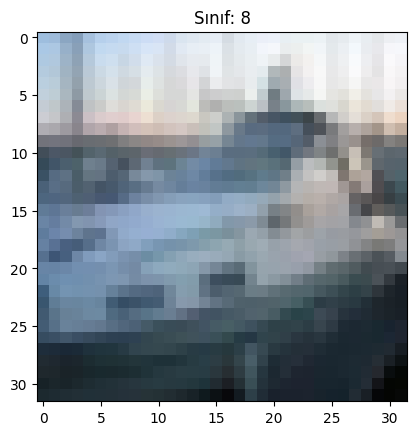

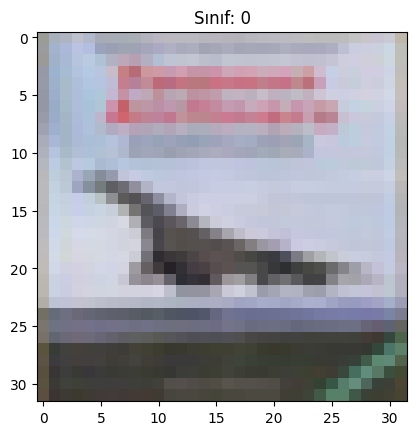

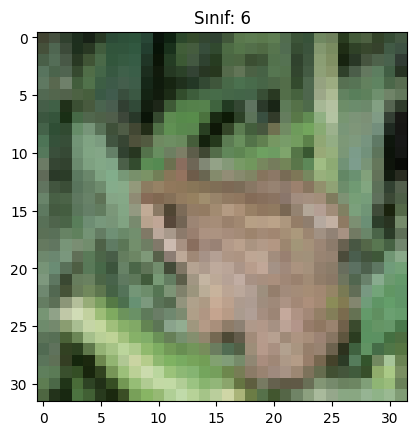

In [34]:
for i in range(5):
    plt.imshow(x_test[1])
    plt.title("Sınıf: "+ str(y_test[i][0]))
    plt.show()

In [20]:
x_data = np.concatenate((x_train , x_test) , axis=0)
y_data = np.concatenate((y_train , y_test) , axis=0)

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size=0.2 , random_state=42)

In [22]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [24]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train , num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [27]:
model = Sequential()

model.add(Conv2D(32,(3,3) , activation="relu" , padding="same" , input_shape=x_train.shape[1:])) # 3x3 lük filtre uygular
# relu: negatif değerleri sıfır yapar pozitif kısımları korur.
#padding: çıktı boyutunun giriş boyutuna benzerliği sağlanır

# giriş kanal sayısı: 3
#çıkış kanal sayısı: 32
#her bir filtre için toplam parametre sayısı: 3*3*3 + 1 (bias) = 28
#genel toplam parametre: 28*32 = 896

model.add(Conv2D(32,(3,3) , activation="relu"))
#FİLTRE = 3*3
#GİRİŞ KANAL SAYISI: 32
#ÇIKIŞ KANAL SAYISI : 32
# HER BİR FİLTRE İÇİN TOPLAM PARAMETRE SAYISI: 3*3*32 + 1(bias) = 289
#GENEL TOPLAM PARAMETRE: 289*32 = 9248

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3) , activation="relu" , padding="same"))
model.add(Conv2D(64,(3,3) , activation="relu"))


model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(num_classes , activation="softmax"))

In [28]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [30]:
batch_size = 128
epochs= 10
model.fit(x_train , y_train , batch_size=batch_size , epochs=epochs , validation_data = (x_test,y_test))

Epoch 1/10
375/375 [==============================] - 116s 302ms/step - loss: 1.5222 - accuracy: 0.4474 - val_loss: 1.1776 - val_accuracy: 0.5801
Epoch 2/10
375/375 [==============================] - 108s 288ms/step - loss: 1.0617 - accuracy: 0.6271 - val_loss: 1.0048 - val_accuracy: 0.6454
Epoch 3/10
375/375 [==============================] - 105s 279ms/step - loss: 0.8429 - accuracy: 0.7068 - val_loss: 0.8958 - val_accuracy: 0.6867
Epoch 4/10
375/375 [==============================] - 110s 294ms/step - loss: 0.6925 - accuracy: 0.7601 - val_loss: 0.7523 - val_accuracy: 0.7375
Epoch 5/10
375/375 [==============================] - 95s 254ms/step - loss: 0.5797 - accuracy: 0.7996 - val_loss: 0.7537 - val_accuracy: 0.7432
Epoch 6/10
375/375 [==============================] - 102s 272ms/step - loss: 0.4688 - accuracy: 0.8364 - val_loss: 0.7520 - val_accuracy: 0.7551
Epoch 7/10
375/375 [==============================] - 116s 309ms/step - loss: 0.3657 - accuracy: 0.8729 - val_loss: 0.7781 - 